Knot vector: [0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.4166666666666667, 0.5, 0.5833333333333334, 0.6666666666666666, 0.75, 0.8333333333333334, 0.9166666666666666, 1.0]
[[0.5       ]
 [1.54845661]]


<function matplotlib.pyplot.show(*args, **kw)>

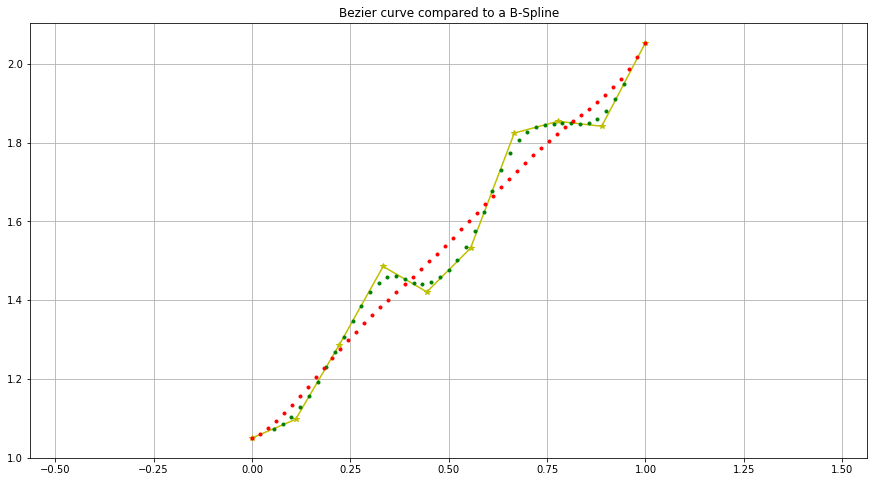

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from geomdl import BSpline

curve = BSpline.Curve()
curve.degree = 2
# x = [1,2.5,3,4,5]
# y = [1,2.2,3.5,4,5.3]
x = np.linspace(0, 1, 10)
np.random.seed(42)
noise = np.random.normal(0,0.1,len(x))
y = x + 1 + noise

control_points = []
for i in range(len(x)):
    control_points.append([x[i],y[i]])

curve.ctrlpts = control_points
curve.knotvector = np.linspace(0,len(x) + curve.degree,len(x) + curve.degree + 1)
print("Knot vector:",curve.knotvector)


# Set evaluation delta (controls the number of curve points)
curve.delta = 0.025
# Get curve points (the curve will be automatically evaluated)
curve_points = curve.evalpts
spline_points = np.array(curve_points)

# --------------------------------------------------------------------------------------------------------
# see here - https://bezier.readthedocs.io/en/latest/python/reference/bezier.curve.html
import matplotlib.pyplot as plt
import bezier
import numpy as np

# Need at least degree + 1 control points
points = control_points
points = np.array(points)
points = points.T
nodes = np.asfortranarray(points)
k = 3
curve = bezier.Curve(nodes, degree=k)

fig = plt.figure(figsize=(15,8))
print(curve.evaluate(0.5))
plt.plot(points[0,:],points[1,:],'y-*')

s_vals = np.linspace(0.0, 1.0, 50)
plt.plot(spline_points[:,0],spline_points[:,1],'g.')
plt.plot(curve.evaluate_multi(s_vals)[0],curve.evaluate_multi(s_vals)[1],'r.')

plt.title("Bezier curve compared to a B-Spline")
plt.grid(True)
plt.axis('equal')
plt.show

Knot vector: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


<function matplotlib.pyplot.show(*args, **kw)>

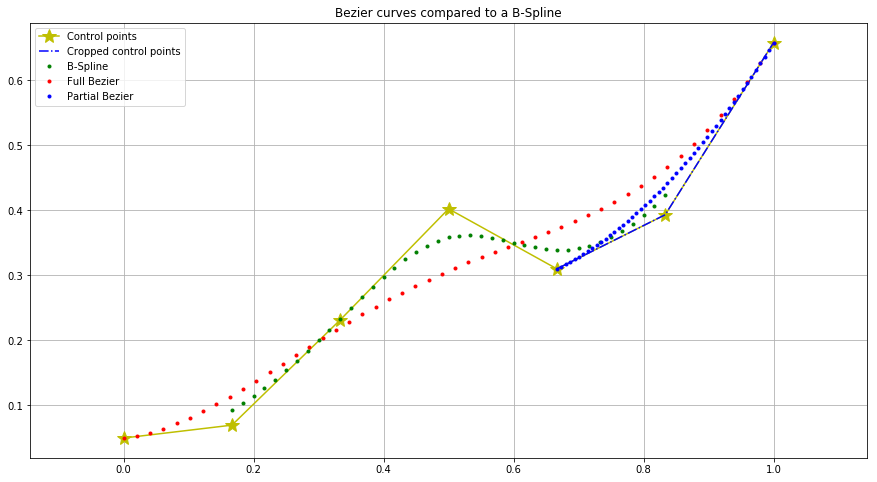

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from geomdl import BSpline

curve = BSpline.Curve()
curve.degree = 3
x = np.linspace(0, 1, 7)
np.random.seed(42)
noise = np.random.normal(0,0.1,len(x))
y = 0.5*x + noise

control_points = []
for i in range(len(x)):
    control_points.append([x[i],y[i]])

curve.ctrlpts = control_points
curve.knotvector = np.linspace(0,len(x) + curve.degree,len(x) + curve.degree + 1)
print("Knot vector:",curve.knotvector)


# Set evaluation delta (controls the number of curve points)
curve.delta = 0.025
# Get curve points (the curve will be automatically evaluated)
curve_points = curve.evalpts
spline_points = np.array(curve_points)

# --------------------------------------------------------------------------------------------------------
# see here - https://bezier.readthedocs.io/en/latest/python/reference/bezier.curve.html
import matplotlib.pyplot as plt
import bezier
import numpy as np

# Need at least degree + 1 control points
# points = control_points
full_points = np.array(control_points).T
nodes = np.asfortranarray(full_points)
k = 3
full_bezier_curve = bezier.Curve(nodes, degree=k)

# Partial Bezier curve
n = 3
partial_points = control_points[-n:] # get last n points
points = np.array(partial_points).T
nodes = np.asfortranarray(points)
k = 3
partial_bezier_curve = bezier.Curve(nodes, degree=k)

fig = plt.figure(figsize=(15,8))
plt.plot(full_points[0,:],full_points[1,:],'y-*',markersize=15,label='Control points')
plt.plot(points[0,:],points[1,:],'b-.',label='Cropped control points')


s_vals_full = np.linspace(0.0, 1.0, 50)
s_vals_partial = s_vals_full
# s_vals_partial = np.linspace(min(partial_points)[0], max(partial_points)[0], 20)

plt.plot(spline_points[:,0],spline_points[:,1],'g.',label='B-Spline')
plt.plot(full_bezier_curve.evaluate_multi(s_vals_full)[0],
         full_bezier_curve.evaluate_multi(s_vals_full)[1],'r.',label='Full Bezier')
plt.plot(partial_bezier_curve.evaluate_multi(s_vals_partial)[0],
         partial_bezier_curve.evaluate_multi(s_vals_partial)[1],'b.',label='Partial Bezier')


plt.title("Bezier curves compared to a B-Spline")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show

Knot vector: [0.0, 0.05555555555555555, 0.1111111111111111, 0.16666666666666666, 0.2222222222222222, 0.2777777777777778, 0.3333333333333333, 0.3888888888888889, 0.4444444444444444, 0.5, 0.5555555555555556, 0.6111111111111112, 0.6666666666666666, 0.7222222222222222, 0.7777777777777778, 0.8333333333333334, 0.8888888888888888, 0.9444444444444444, 1.0]


<function matplotlib.pyplot.show(*args, **kw)>

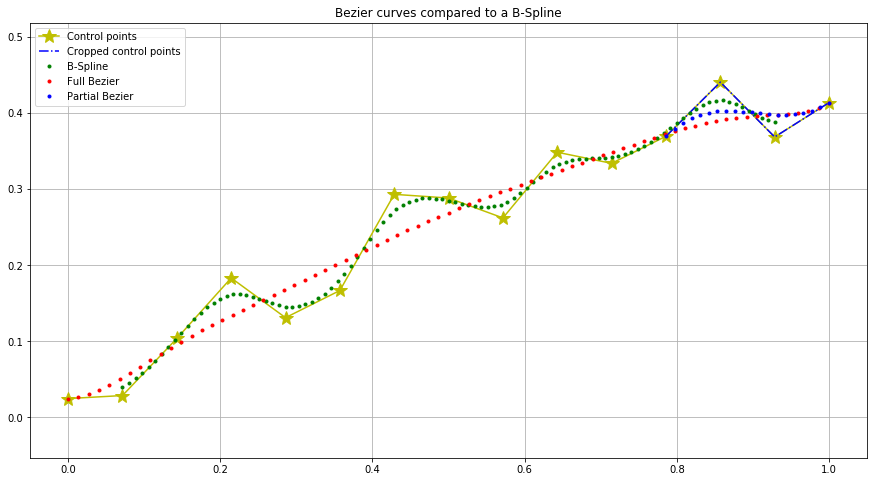

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from geomdl import BSpline

curve = BSpline.Curve()
curve.degree = 3
x = np.linspace(0, 1, 15)
np.random.seed(42)
noise = np.random.normal(0,0.05,len(x))
y = 0.5*x + noise

control_points = []
for i in range(len(x)):
    control_points.append([x[i],y[i]])

curve.ctrlpts = control_points
curve.knotvector = np.linspace(0,len(x) + curve.degree,len(x) + curve.degree + 1)
print("Knot vector:",curve.knotvector)


# Set evaluation delta (controls the number of curve points)
curve.delta = 0.01
# Get curve points (the curve will be automatically evaluated)
curve_points = curve.evalpts
spline_points = np.array(curve_points)

# --------------------------------------------------------------------------------------------------------
# see here - https://bezier.readthedocs.io/en/latest/python/reference/bezier.curve.html
import matplotlib.pyplot as plt
import bezier
import numpy as np

# Need at least degree + 1 control points
# points = control_points
full_points = np.array(control_points).T
nodes = np.asfortranarray(full_points)
k = 3
full_bezier_curve = bezier.Curve(nodes, degree=k)

# Partial Bezier curve
n = 4
partial_points = control_points[-n:] # get last n points

# partial_points = control_points[-n-3:-n+1] # get last n points
# Swapping out control points for spline points
# partial_points[-2] = spline_points[-1]
# partial_points[-3] = spline_points[-2]

points = np.array(partial_points).T
nodes = np.asfortranarray(points)
k = 3
partial_bezier_curve = bezier.Curve(nodes, degree=k)

fig = plt.figure(figsize=(15,8))
plt.plot(full_points[0,:],full_points[1,:],'y-*',markersize=15,label='Control points')
plt.plot(points[0,:],points[1,:],'b-.',label='Cropped control points')


s_vals_full = np.linspace(0.0, 1.0, len(x)*5)
s_vals_partial = np.linspace(0.0, 1.0, len(partial_points)*5)
# s_vals_partial = np.linspace(min(partial_points)[0], max(partial_points)[0], 20)

plt.plot(spline_points[:,0],spline_points[:,1],'g.',label='B-Spline')
plt.plot(full_bezier_curve.evaluate_multi(s_vals_full)[0],
         full_bezier_curve.evaluate_multi(s_vals_full)[1],'r.',label='Full Bezier')
plt.plot(partial_bezier_curve.evaluate_multi(s_vals_partial)[0],
         partial_bezier_curve.evaluate_multi(s_vals_partial)[1],'b.',label='Partial Bezier')


plt.title("Bezier curves compared to a B-Spline")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show